# Importing required Libraries and Modules

In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import warnings
warnings.filterwarnings('ignore')

# Importing a document

# Tokenizing and cleaning the text

In [2]:
text = open('read.txt', encoding="utf-8").read()
lower_case = text.lower()
# str.maketrans removes any punctuations 
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words
tokenized_words = word_tokenize(cleaned_text, "english")


# Removing Stop words

In [3]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [4]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

# Emotions Listing

In [7]:
emotion_list = []

with open('emotions1.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' ignorant', ' hated', ' entitled'] 
 

Count of each emotion 
 Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1, ' ignorant': 1})


# Visualizing the Emotions Graph

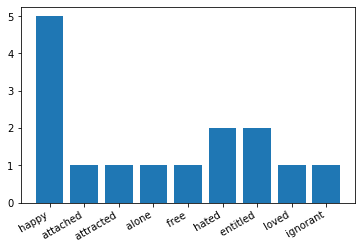

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()